# One hot Encoding
One hot encoding is a method used to represent categorical data as numerical data in machine learning and data analysis. In this method, each category is assigned a unique integer number, and then each number is represented as a binary vector where all elements are zero except the element corresponding to the assigned integer number, which is set to one.
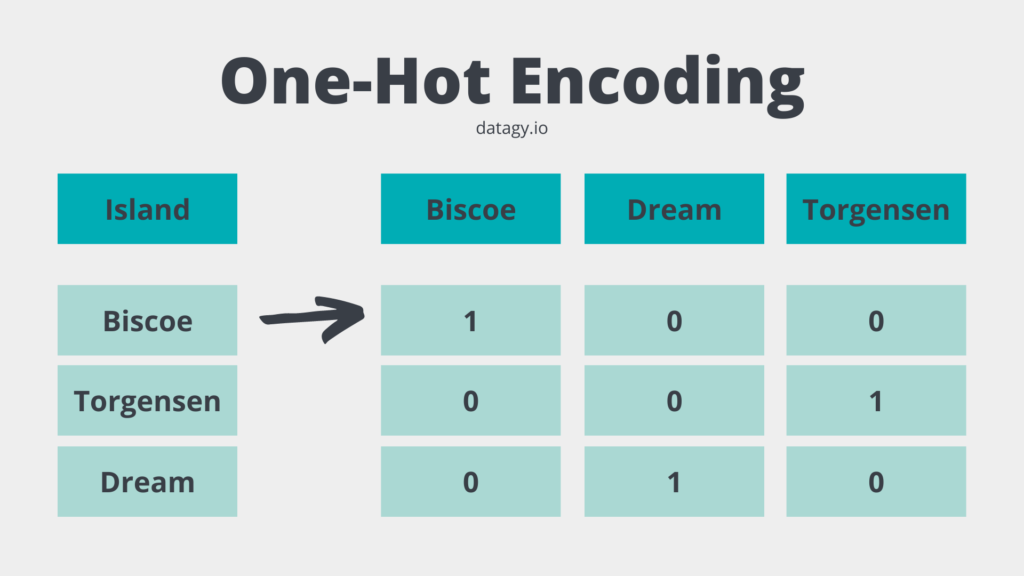

One hot encoding is used because many machine learning algorithms require numerical data to perform various tasks such as classification, regression, clustering, and others. However, categorical data, such as gender, color, and occupation, cannot be directly used as numerical data because they don't have a meaningful numerical value.

By using one hot encoding, we can convert categorical data into numerical data that can be used as input for various machine learning algorithms. One hot encoding also ensures that the data is represented in a consistent and standardized way, which can help improve the performance of the algorithm.

In addition, one hot encoding can be useful in reducing the dimensionality of the data, as it can represent a large number of categories with a relatively small number of numerical variables. This is particularly useful in cases where there are many categories, but only a few of them are relevant for the task at hand.

# Multi- colinearlity
Multicollinearity refers to a situation where two or more predictor variables in a regression model are highly correlated with each other. This can lead to problems in the regression model, such as unstable and unreliable estimates of the regression coefficients, and difficulties in interpreting the model. One of the main consequences of multicollinearity is that it can make it difficult to identify the relative importance of each predictor variable in the model.

One-hot encoding can be affected by multicollinearity when two or more categories of a categorical variable are highly correlated with each other. This can lead to problems in the model, such as unstable and unreliable estimates of the regression coefficients, and difficulties in interpreting the model. In such cases, it may be necessary to drop one or more of the correlated variables to avoid multicollinearity in the model.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [4]:
df["brand"].unique() # total unique cars in the column

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [5]:
df["brand"].nunique()  # total number of unique cars in the column

32

In [6]:
df["brand"].value_counts().head(10) # displaying first 10

Maruti        2448
Hyundai       1415
Mahindra       772
Tata           734
Toyota         488
Honda          467
Ford           397
Chevrolet      230
Renault        228
Volkswagen     186
Name: brand, dtype: int64

In [7]:
df["fuel"].value_counts().head(10) # 4 types of fuels

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [8]:
df["owner"].value_counts().head(10) # 5 types of owners

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [9]:
df["selling_price"].value_counts()

300000     227
600000     213
350000     209
550000     204
450000     195
          ... 
808000       1
92000        1
731000       1
1365000      1
1237000      1
Name: selling_price, Length: 677, dtype: int64

In [10]:
df["selling_price"].max() # this is the maximum selling price

10000000

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

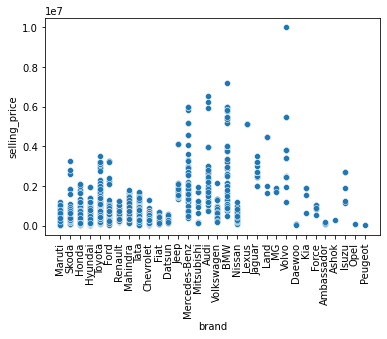

In [12]:
sns.scatterplot(df["brand"], df["selling_price"])
plt.xticks(rotation=90)
plt.show() # if you dont use this all the ticks will be displyed in the form of lists

# One hot encoding using pandas itself
This is used in the field of data sciene or sometimes in data analyis but not in ml model because pandas doesnt remember which column did it kept in which position as you can see below

In [13]:
pd.get_dummies(df, columns = ["fuel","owner"]).head() # not using brand because it has many columns

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0


In [14]:
pd.get_dummies(df, columns = ["fuel","owner"], drop_first= True) # removes first column from each category removing the problem for multicolinearity

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


# One hot encoding using sklearn

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :4], df.iloc[:, -1], test_size=0.2, random_state=42)

In [16]:
X_train

,brand,km_driven,fuel,owner
6518,Tata,2560,Petrol,First Owner
6144,Honda,80000,Petrol,Second Owner
6381,Hyundai,150000,Diesel,Fourth & Above Owner
438,Maruti,120000,Diesel,Second Owner
5939,Maruti,25000,Petrol,First Owner
...,...,...,...,...
5226,Mahindra,120000,Diesel,First Owner
5390,Maruti,80000,Diesel,Second Owner
860,Hyundai,35000,Petrol,First Owner
7603,Maruti,27000,Diesel,First Owner


In [17]:
y_train # it is not showing name because when in pandas when i do this "df.iloc[:, -1]" the resulting object is a Pandas Series, which does not have the column name, because it only represents
        #a single column

6518    520000
6144    300000
6381    380000
438     530000
5939    335000
         ...  
5226    475000
5390    530000
860     576000
7603    770000
7270    155000
Name: selling_price, Length: 6502, dtype: int64

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
ohe = OneHotEncoder(drop = "first") # removing frist column from both the categories
                                    # use sparese-"false" so that you dont have to do .toarray() 

In the dataset I only wnat to encode fuel and owner, which I cant do it directyly, first I need to apply encoding to the columns separeately and then add it back agin to the table. This can be done in one line by using column transformer but for now i am not using that 

In [20]:
# Note that i am fitting and transforimng the data simultaneously
X_train_new = ohe.fit_transform(X_train[["fuel","owner"]]) # by default the ohe in sklearn create a sparse matrix to view that use this ohe
                                                        #.fit_transform(X_train[["fuel","owner"]]).toarray()

In [21]:
X_train_new

<6502x7 sparse matrix of type '<class 'numpy.float64'>'
	with 8718 stored elements in Compressed Sparse Row format>

In [22]:
X_train_new.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [23]:
X_train_new.shape

(6502, 7)

In [24]:
X_test_new = ohe.transform(X_test[['fuel','owner']])

In [25]:
X_test_new

<1626x7 sparse matrix of type '<class 'numpy.float64'>'
	with 2192 stored elements in Compressed Sparse Row format>

In [26]:
X_test_new.toarray()

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [27]:
X_test_new.shape

(1626, 7)

Now I gotta append the encoded columns with the brand and km_driven column

In [28]:
X_train[["brand", "km_driven"]].values

array([['Tata', 2560],
       ['Honda', 80000],
       ['Hyundai', 150000],
       ...,
       ['Hyundai', 35000],
       ['Maruti', 27000],
       ['Maruti', 70000]], dtype=object)

In [29]:
X_train.shape

(6502, 4)

Now i gotta append this to the X_train_new. I need to stack this horizontally with the encoded data to get the compplete data

In [30]:
np.hstack((X_train[['brand','km_driven']].values.reshape(-1, 2),X_train_new.toarray())) # added the columns

array([['Tata', 2560, 0.0, ..., 0.0, 0.0, 0.0],
       ['Honda', 80000, 0.0, ..., 1.0, 0.0, 0.0],
       ['Hyundai', 150000, 1.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['Hyundai', 35000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Maruti', 27000, 1.0, ..., 0.0, 0.0, 0.0],
       ['Maruti', 70000, 0.0, ..., 1.0, 0.0, 0.0]], dtype=object)

# One hot encoding with top categories (brand only)

In [32]:
df["brand"].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Peugeot             1
Opel                1
Ashok               1
Name: brand, dtype: int64

Now, i am passing all the categories below 100 to others column

In [33]:
counts = df["brand"].value_counts()

In [36]:
df["brand"].nunique()
threshold = 100

In [38]:
repl = counts[counts <= threshold].index # storing the categories with less thatn 100 cars in repl

In [39]:
pd.get_dummies(df["brand"].replace(repl, "uncommon"))

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,0,1,0,0,0,0,0,0,0,0
8124,0,0,0,0,1,0,0,0,0,0,0,0,0
8125,0,0,0,0,0,0,1,0,0,0,0,0,0
8126,0,0,0,0,0,0,0,0,0,1,0,0,0


# NOTE this process is not used in real-world with the use of column transformer this can be done in one line of code. I just did this for knowledge